# En este Notebook realizaremos Análisis de casos completos e Imputación por la media/mediana/moda, valor arbitrario, categoría dedicada, imputación aleatoria e indicador binario.


In [1]:
import pandas as pd
# para mostrar todas las columnas del dataframe en el notebook
pd.set_option('display.max_columns', None)

# Para graficado
import matplotlib.pyplot as plt
import seaborn as sns

# Para divisdir el conjunto de datos
from sklearn.model_selection import train_test_split

# Para la imputación de datos con sklearn
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [2]:
# Cargando datos
data = pd.read_csv('/home/ia/cursoECI/cursoIV/Datasets/raw/credict_approval.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [3]:
# Número de variables y objetos en el dataset
data.shape

(690, 16)

In [4]:
# Tipos de datos
print(data.dtypes,'\n')
print(data.dtypes.value_counts())

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16      int64
dtype: object 

object     9
float64    4
int64      3
Name: count, dtype: int64


In [5]:
# Variables con valores faltantes
print(data.isnull().any())

A1      True
A2      True
A3     False
A4      True
A5      True
A6      True
A7      True
A8     False
A9     False
A10    False
A11    False
A12    False
A13    False
A14     True
A15    False
A16    False
dtype: bool


In [6]:
(
       data
       .isnull()
       .sum()
       .sort_values(ascending=False)
)

A14    13
A1     12
A2     12
A6      9
A7      9
A4      6
A5      6
A3      0
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A15     0
A16     0
dtype: int64

In [7]:
# Inspeccionemos el porcentaje de valores faltantes en cada variable
data.isnull().mean().sort_values(ascending=False)

A14    0.018841
A1     0.017391
A2     0.017391
A6     0.013043
A7     0.013043
A4     0.008696
A5     0.008696
A3     0.000000
A8     0.000000
A9     0.000000
A10    0.000000
A11    0.000000
A12    0.000000
A13    0.000000
A15    0.000000
A16    0.000000
dtype: float64

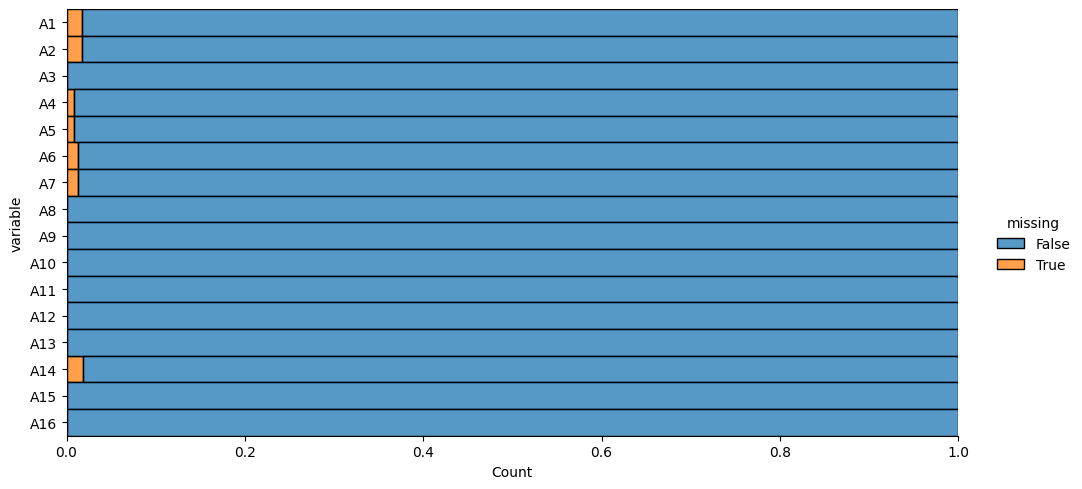

In [8]:
#Gráfica de Proporción de valores nulos por variable
(
    data
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

<Axes: >

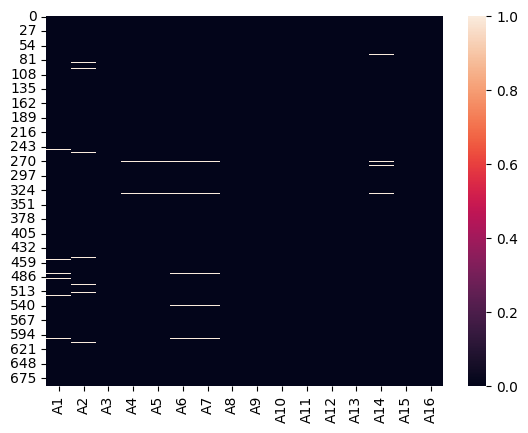

In [10]:
#valores nulos en todo el conjunto de datos
(
    data
    .isnull()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

In [12]:
# Separamos las Variables con datos faltantes
missin_value_vars = ['A14','A1','A2','A6','A7','A4','A5']
numerical_features_with_missing_values = ['A2','A14']
non_numerical_features_with_missing_values = ['A1','A6','A7','A4','A5']

### Análisis de Casos Completos

In [13]:
# Creamos un dataset con casos completos
data_cca = data.dropna()
print('Número total de observaciones: {}'.format(len(data)))
print('Número de observaciones con casos completos: {}'.format(len(data_cca)))

Número total de observaciones: 690
Número de observaciones con casos completos: 653


In [14]:
# Tambien podemos indicar qué variables a considerar con casos completos
data_cca = data.dropna(subset=numerical_features_with_missing_values)
print('Number of total observations: {}'.format(len(data)))
print('Number of observations with complete cases: {}'.format(len(data_cca)))

Number of total observations: 690
Number of observations with complete cases: 666


### Imputación por la media/mediana/moda utilizando Scikit-learn

In [15]:
# Separemos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    data[numerical_features_with_missing_values],
    data['A16'],
    test_size=0.3,
    random_state=0)

In [16]:
# Instanciamos un objeto de clase SimpleImputer
imputer = SimpleImputer(strategy='median')

# Entrenemos al imputador sobre los datos de entrenamiento (aprenderá la mediana de todas las variables)
imputer.fit(X_train)

# Observemos las medianas aprendidas:
imputer.statistics_

array([ 28.835, 160.   ])

In [17]:
# Realizamos imputacion en los conjuntos de entrenamiento y prueba
# NOTA: Los datos se regresan como numpy arrays!

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Corroboramos que los valores faltantes fueron imputados
pd.DataFrame(X_train).isnull().sum()

0    0
1    0
dtype: int64

### Imputación con la moda utilizando sklearn

In [18]:
# Separamos los datos en entrenamiento y prueba (variable categóricas)

X_train, X_test, y_train, y_test = train_test_split(
    data[non_numerical_features_with_missing_values], data['A16'], test_size=0.3, random_state=0)

In [19]:
# creamos el objeto de SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# entrenamos
imputer.fit(X_train)

# observamos las modas aprendidas:
imputer.statistics_

array(['b', 'c', 'v', 'u', 'g'], dtype=object)

In [20]:
# Imputamos en los conjuntos de entrenamiento y pruaba y verificamos la imputación
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

pd.DataFrame(X_train).isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

### Imputación con Valor arbitrario usando sklearn

In [21]:
# Separamos los datos en ctos. de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data[numerical_features_with_missing_values],
    data['A16'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((483, 2), (207, 2))

In [22]:
# Instanciamos y entrenamos el SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=99)
imputer.fit(X_train)

imputer.statistics_

array([99., 99.])

In [23]:
# Imputamos los conjuntos de entrenamiento y prueba (numpy arrays)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# revisamos que los valores faltantes fueron imputados
pd.DataFrame(X_train).isnull().sum()

0    0
1    0
dtype: int64

In [24]:
# Si quisiéramos continuar con nuestro análisis de datos, tendríamos que codificar X_train en un dataframe:
X_train = pd.DataFrame(
    X_train,
    columns=imputer.get_feature_names_out(),  # the variable names
)

X_train.head(10)

,A2,A14
0,46.08,396.0
1,15.92,120.0
2,36.33,50.0
3,22.17,100.0
4,57.83,360.0
5,19.67,80.0
6,22.50,144.0
7,20.25,0.0
8,25.17,0.0
9,40.25,0.0


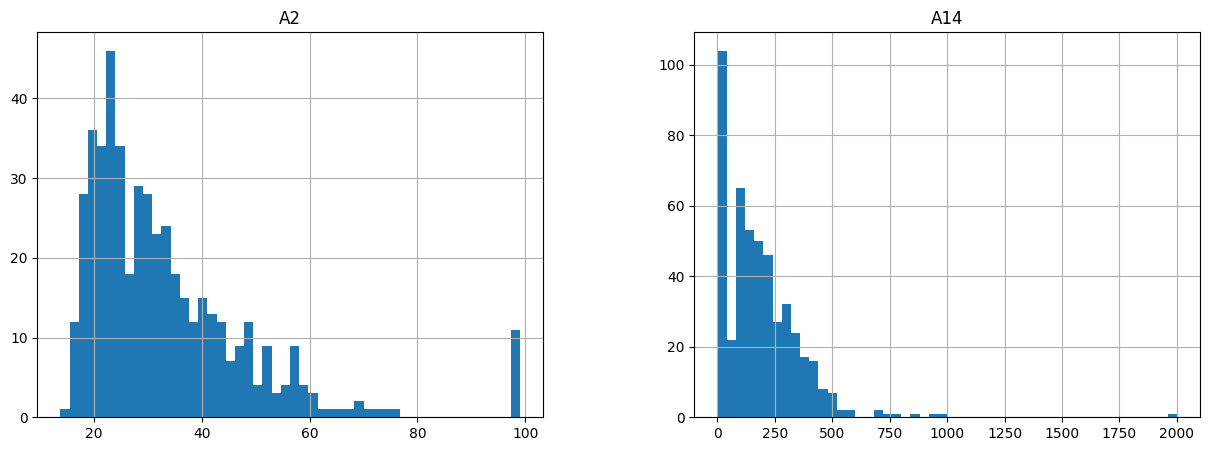

In [25]:
# Exploremos los cambios en la distribución despues de la imputacion

X_train.hist(bins=50, figsize=(15, 5))
plt.show()

### Imputación con categoría dedicada usando sklearn

In [26]:
# Separemos los datos en entrenamiento y prueba descritos sólo por las variables no numéricas

X_train, X_test, y_train, y_test = train_test_split(
    data[non_numerical_features_with_missing_values], data['A16'], test_size=0.3, random_state=0)

In [27]:
# Creamos una instancia de SimpleImputer y entrenamos
imputer = SimpleImputer(strategy='constant', fill_value='Missing')
imputer.fit(X_train)

# Vemos estadisticas:
imputer.statistics_

array(['Missing', 'Missing', 'Missing', 'Missing', 'Missing'],
      dtype=object)

In [28]:
#Realizamos la imputacion

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

pd.DataFrame(X_train).isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [29]:
#Convertimos a un dataframe
X_train = pd.DataFrame(
    X_train,
    columns=imputer.get_feature_names_out(),  # the variable names
)

X_train.head(10)

,A1,A6,A7,A4,A5
0,a,c,v,u,g
1,a,q,v,u,g
2,b,w,v,y,p
3,b,ff,ff,y,p
4,b,m,v,u,g
5,a,q,h,u,g
6,a,i,v,u,g
7,b,e,dd,u,g
8,b,cc,v,u,g
9,b,e,z,u,g


### Imputación Aleatoria

Se deja de ejercicio 

### Agregando un indicador binario

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [31]:
indicator = MissingIndicator(error_on_new=True, features='missing-only')
indicator.fit(X_train) 

# Podemos ver las variables con NaNs:
# Los resultados muestran los índices de las columnas del numpy array

indicator.features_

array([ 0,  1,  3,  4,  5,  6, 13])

In [34]:
def get_missing_value_indicatord_dataset(dataset, trained_indicator):

    # Creamos un nombre de columna para cada variable con valores faltantes
    indicator_cols = [c+'_NA' for c in dataset.columns[trained_indicator.features_]]

    # Concatenamos el conjunto de datos original con los indicadores de valores faltantes
    dataset = pd.concat([
    dataset.reset_index(),
    pd.DataFrame(trained_indicator.transform(dataset), columns = indicator_cols)],
    axis=1)

    return dataset

In [35]:
indicatedData= get_missing_value_indicatord_dataset(X_train,indicator)
indicatedData.head(100)

,index,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A1_NA,A2_NA,A4_NA,A5_NA,A6_NA,A7_NA,A14_NA
0,596,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396.0,4159,False,False,False,False,False,False,False
1,303,a,15.92,2.875,u,g,q,v,0.085,f,f,0,f,g,120.0,0,False,False,False,False,False,False,False
2,204,b,36.33,2.125,y,p,w,v,0.085,t,t,1,f,g,50.0,1187,False,False,False,False,False,False,False
3,351,b,22.17,0.585,y,p,ff,ff,0.000,f,f,0,f,g,100.0,0,False,False,False,False,False,False,False
4,118,b,57.83,7.040,u,g,m,v,14.000,t,t,6,t,g,360.0,1332,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,112,b,24.58,12.500,u,g,w,v,0.875,t,f,0,t,g,260.0,0,False,False,False,False,False,False,False
96,466,b,31.08,3.085,u,g,c,v,2.500,f,t,2,t,g,160.0,41,False,False,False,False,False,False,False
97,20,b,25.00,11.250,u,g,c,v,2.500,t,t,17,f,g,200.0,1208,False,False,False,False,False,False,False
98,65,b,34.17,1.540,u,g,cc,v,1.540,t,t,1,t,g,520.0,50000,False,False,False,False,False,False,False


In [36]:
# Hacemos lo mismo para el cto. de prueba
tmp = indicator.transform(X_test)

X_test = pd.concat(
    [
        X_test.reset_index(),
        pd.DataFrame(tmp, columns=indicator.get_feature_names_out()),
    ],
    axis=1,
)

X_test.head()

,index,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,missingindicator_A1,missingindicator_A2,missingindicator_A4,missingindicator_A5,missingindicator_A6,missingindicator_A7,missingindicator_A14
0,14,a,45.83,10.50,u,g,q,v,5.000,t,t,7,t,g,0.0,0,False,False,False,False,False,False,False
1,586,b,64.08,20.00,u,g,x,h,17.500,t,t,9,t,g,0.0,1000,False,False,False,False,False,False,False
2,140,a,31.25,3.75,u,g,cc,h,0.625,t,t,9,t,g,181.0,0,False,False,False,False,False,False,False
3,492,b,39.25,9.50,u,g,m,v,6.500,t,t,14,f,g,240.0,4607,False,False,False,False,False,False,False
4,350,a,26.17,2.00,u,g,j,j,0.000,f,f,0,t,g,276.0,1,False,False,False,False,False,False,False


### Imputación por la media/moda + indicador binario

Se deja como ejercicio